## Logistic Regression model

In [63]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Import our dataset for the lung cancer survey in our notebook and load the table
data = pd.read_csv("dataset.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [65]:
# Get information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  DIAGNOSIS              

<AxesSubplot:>

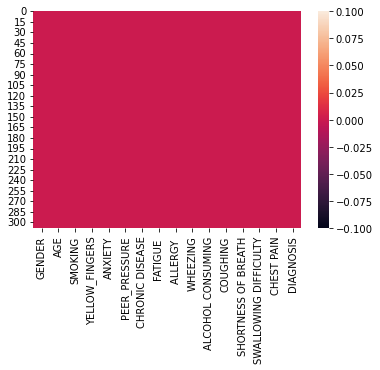

In [66]:
# Cleaning the dataset in order to remove any empty column if there is any by plotting a heatmap
sns.heatmap(data.isnull())

In [67]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [68]:
data.DIAGNOSIS = [1 if value == "YES" else 0 for value in data.DIAGNOSIS]

In [69]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


<AxesSubplot:>

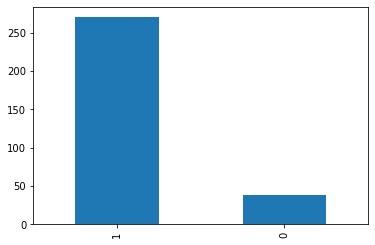

In [70]:
# Convert diagnosis column into a category type and plot a bar chart to visualise the info
data["DIAGNOSIS"] = data['DIAGNOSIS'].astype("category", copy=False)
data["DIAGNOSIS"].value_counts().plot(kind="bar")

In [85]:
# Divide the dataset into predictors and target variable
# Target variable
y = data["DIAGNOSIS"] 

# Predictors
X = data.drop(["DIAGNOSIS", "GENDER", "AGE"], axis=1)
#X = data.drop(['DIAGNOSIS', 'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE','CHRONIC DISEASE', 'FATIGUE ', 'SHORTNESS OF BREATH', 'CHEST PAIN'], axis=1)

## Normalisation of data

In [86]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [87]:
X_scaled

array([[-1.13529242,  0.86929961,  1.0032415 , ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.88083033, -1.15035137, -0.99676897, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.13529242, -1.15035137, -0.99676897, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.88083033, -1.15035137, -0.99676897, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.88083033, -1.15035137,  1.0032415 , ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-1.13529242, -1.15035137, -0.99676897, ..., -1.33558369,
         1.06350105, -1.12047956]])

## Divide data into training and testing parts

In [88]:
# In this case we will be testing on 30% of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

## Training the model

In [89]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
lr = LogisticRegression()

# train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable based on the test data
y_predict = lr.predict(X_test)

In [90]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [91]:
y_test

288    1
9      1
57     1
60     1
25     1
      ..
172    1
250    1
19     0
146    1
79     1
Name: DIAGNOSIS, Length: 93, dtype: category
Categories (2, int64): [0, 1]

## Evaluation of the model

In [92]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.98


In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93



In [94]:
lr.score(X_test, y_test)

0.978494623655914

In [95]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.967741935483871

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.967741935483871

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [48]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [49]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [50]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)